In [1]:
from glob import glob
from random import shuffle, seed
import pandas as pd
from sklearn import datasets, linear_model, metrics, model_selection
import cv2

In [21]:
def flatten(filename):
    img = cv2.imread(filename)
    #as images do not have the same shape -> cannot create a training array of datapoints having the same shape
    #so I standardize the img size to 70,70,3
    #size reduction also reduces the time it takes to train models dramatically without significant changes in the accuracy
    img = cv2.resize(img, (70,70))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape(1,-1)
    return img[0]

men_files = glob("/Users/nhatpham/Downloads/Man's Clothing/*")
women_files = glob("/Users/nhatpham/Downloads/Woman's Clothing/*")


raw_data = [(flatten(filename),'men') for filename in men_files] + \
           [(flatten(filename),'women') for filename in women_files]

In [3]:
raw_data

[(array([255, 255, 255, ..., 255, 255, 251], dtype=uint8), 'men'),
 (array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 'men'),
 (array([119, 113,  99, ...,   8,   7,   3], dtype=uint8), 'men'),
 (array([166, 165, 163, ..., 212, 212, 214], dtype=uint8), 'men'),
 (array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 'men'),
 (array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 'men'),
 (array([ 20,  50,  27, ..., 131, 103,  80], dtype=uint8), 'men'),
 (array([179, 174, 178, ..., 158, 159, 154], dtype=uint8), 'men'),
 (array([ 56,  45,  10, ..., 111, 100,  70], dtype=uint8), 'men'),
 (array([200, 203, 208, ..., 195, 199, 206], dtype=uint8), 'men'),
 (array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 'men'),
 (array([230, 231, 235, ..., 234, 235, 237], dtype=uint8), 'men'),
 (array([255, 255, 234, ...,  28,  31,  21], dtype=uint8), 'men'),
 (array([152, 151, 146, ..., 182, 182, 170], dtype=uint8), 'men'),
 (array([75, 81, 62, ..., 66, 45, 50], dtype=uint8), 'men'),
 

In [22]:
#process data to obtain x and y values to train the classification models
data = np.array([cd for [cd,_y] in raw_data])
labels = np.array([_y for [cd,_y] in raw_data])
y = np.array([1 if label == 'men' else 0 for label in labels])

In [5]:
data

array([[255, 255, 255, ..., 255, 255, 251],
       [255, 255, 255, ..., 255, 255, 255],
       [119, 113,  99, ...,   8,   7,   3],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [  1,   0,   0, ...,  70,  36,   2],
       [246, 246, 246, ..., 230, 230, 230]], dtype=uint8)

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, y, test_size = 0.2, random_state = 101)

In [8]:
X_train

array([[ 76,  67,  68, ...,  34, 121, 150],
       [103,  66,  45, ...,  66,  31,  33],
       [177, 148, 142, ..., 101,  91,  92],
       ...,
       [ 66,  79,  56, ..., 101,  35,   5],
       [140,  59,  52, ..., 138,  58,  51],
       [  2,   2,   0, ..., 161,  34,  15]], dtype=uint8)

# Linear svm

In [9]:
from sklearn.svm import SVC
svc1 = SVC(kernel = 'linear')
svc1.fit(X_train, y_train.reshape(-1,1))
svc1_prediction = svc1.predict(X_test)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [10]:
print("Classification report for logistic regression %s:\n%s\n"
      % (svc1, metrics.classification_report(y_test, svc1_prediction)))

print("")
print("TEST SET")
print("accuracy is {}".format(metrics.accuracy_score(y_test,svc1_prediction)))
print("error is {}".format(1-metrics.accuracy_score(y_test,svc1_prediction)))
print("")


print("f-score is {}".format(metrics.accuracy_score(y_test,svc1_prediction)))
disp = metrics.plot_confusion_matrix(svc1, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

Classification report for logistic regression SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.59      0.60      0.59       243
           1       0.62      0.60      0.61       260

    accuracy                           0.60       503
   macro avg       0.60      0.60      0.60       503
weighted avg       0.60      0.60      0.60       503



TEST SET
accuracy is 0.6023856858846919
error is 0.3976143141153081

f-score is 0.6023856858846919
Confusion matrix:
[[146  97]
 [103 157]]


# 2-degree poly svm

In [11]:
svc2 = SVC(kernel = 'poly', degree = 2)
svc2.fit(X_train, y_train.reshape(-1,1))
svc2_prediction = svc2.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Classification report for logistic regression SVC(degree=2, kernel='poly'):
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       243
           1       0.69      0.68      0.68       260

    accuracy                           0.68       503
   macro avg       0.68      0.68      0.68       503
weighted avg       0.68      0.68      0.68       503



TEST SET
accuracy is 0.6759443339960238
error is 0.3240556660039762

f-score is 0.6759443339960238
Confusion matrix:
[[163  80]
 [ 83 177]]


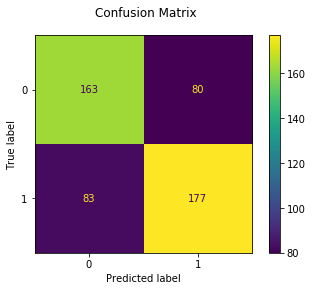

In [12]:
print("Classification report for logistic regression %s:\n%s\n"
      % (svc2, metrics.classification_report(y_test, svc2_prediction)))

print("")
print("TEST SET")
print("accuracy is {}".format(metrics.accuracy_score(y_test,svc2_prediction)))
print("error is {}".format(1-metrics.accuracy_score(y_test,svc2_prediction)))
print("")


print("f-score is {}".format(metrics.accuracy_score(y_test,svc2_prediction)))
disp = metrics.plot_confusion_matrix(svc2, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

# rbf svm

In [13]:
svc3 = SVC(kernel = 'rbf')
svc3.fit(X_train, y_train.reshape(-1,1))
svc3_prediction = svc3.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Classification report for logistic regression SVC():
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       243
           1       0.70      0.68      0.69       260

    accuracy                           0.69       503
   macro avg       0.69      0.69      0.69       503
weighted avg       0.69      0.69      0.69       503



TEST SET
accuracy is 0.6858846918489065
error is 0.31411530815109345

f-score is 0.6858846918489065
Confusion matrix:
[[168  75]
 [ 83 177]]


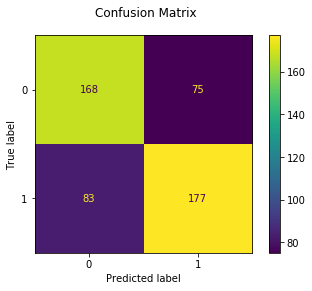

In [14]:
print("Classification report for logistic regression %s:\n%s\n"
      % (svc3, metrics.classification_report(y_test, svc3_prediction)))

print("")
print("TEST SET")
print("accuracy is {}".format(metrics.accuracy_score(y_test,svc3_prediction)))
print("error is {}".format(1-metrics.accuracy_score(y_test,svc3_prediction)))
print("")


print("f-score is {}".format(metrics.accuracy_score(y_test,svc3_prediction)))
disp = metrics.plot_confusion_matrix(svc3, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

<p style="font-weight:bold" > Conclusion</p>
svm produces accuracy rates from 60 to 69%, depending on the kernel fuction. It is not a surprise that the linear kernel performs worst (60% accuracy) as the linear separation does not have the "flexibiliy" to amplify differences to classify data in a higher dimensional space. Using the same logic, polynomial kernel is more flexible, hence produces a better accuracy (67%). RBF is the best kernal as it stretches the original data to infinite dimensions. As a result, this kernel performs better the others with 68.5% accuracy


# VGG16

In [15]:
from keras.models import Sequential
from keras.models import Model
from keras.layers.core import Dense
from keras.layers import Input
from keras.applications.vgg16 import VGG16
import keras

In [16]:
# Generate a model with all layers (with top)
vgg16 = VGG16(weights= 'imagenet', include_top=False, input_shape = (70, 70, 3))
vgg16.trainable = False

#Add a layer where input is the output of the  second last layer 
x = keras.layers.GlobalAveragePooling2D()(vgg16.layers[-2].output)
x = Dense(1, activation='sigmoid', name='predictions')(x)

#Then create the corresponding model 
my_model = Model(inputs = vgg16.input, outputs = x)
my_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 70, 70, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 70, 70, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 70, 70, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 35, 35, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 35, 35, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 35, 35, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 17, 17, 128)      

In [17]:
import keras
my_model.compile(optimizer = keras.optimizers.Adam(), 
                 loss = keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics = [keras.metrics.BinaryAccuracy()])

In [18]:
import cv2
def flatten1(filename):
    """
    takes a filename and turns it into a numpy array of RGB pixels
    """
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (70,70))
    return img

# my files are set up like "images/girls/gapkids/image1.jpg" and "images/boys/oldnavy/image1.jpg"
men_files = glob("/Users/nhatpham/Downloads/Man's Clothing/*")
women_files = glob("/Users/nhatpham/Downloads/Woman's Clothing/*")


raw_data = [(flatten1(filename),'men') for filename in men_files] + \
           [(flatten1(filename),'women') for filename in women_files]

data = np.array([cd for [cd,_y] in raw_data])
labels = np.array([_y for [cd,_y] in raw_data])
y = np.array([1 if label == 'men' else 0 for label in labels])

X_train, X_test, y_train, y_test = model_selection.train_test_split(data, y, test_size = 0.2, random_state = 101)

In [20]:
my_model.fit(x = X_train, y = y_train, validation_data=(X_test,y_test), epochs = 5)

Epoch 1/5
63/63 [==============================] - 65s 1s/step - loss: 0.6083 - binary_accuracy: 0.7646 - val_loss: 0.6310 - val_binary_accuracy: 0.6879
Epoch 2/5
63/63 [==============================] - 64s 1s/step - loss: 0.6050 - binary_accuracy: 0.7735 - val_loss: 0.6305 - val_binary_accuracy: 0.6799
Epoch 3/5
63/63 [==============================] - 68s 1s/step - loss: 0.6024 - binary_accuracy: 0.7825 - val_loss: 0.6299 - val_binary_accuracy: 0.6859
Epoch 4/5
63/63 [==============================] - 67s 1s/step - loss: 0.6004 - binary_accuracy: 0.7865 - val_loss: 0.6287 - val_binary_accuracy: 0.6958
Epoch 5/5
63/63 [==============================] - 61s 963ms/step - loss: 0.5977 - binary_accuracy: 0.7924 - val_loss: 0.6275 - val_binary_accuracy: 0.6918


<p style="font-weight:bold" > Loss function</p>
Cross entropy function determines the loss of a misclassification as a function of the prediction probability. Because of this feature, it is more efficient than mean square error, which does not penalize a missclassification as much as should be. For example, if two man T shirts are misclassified as woman's clothing with the certainty of 60% and 90%, the loss values produced by MSE would be the same. In contrast, cross entropy function factors in the prediction certainty and penalizes the 90%-certainty misclassification more than the other. As a result cross entropy function yields a better result than MSE in classification problems. And the binary cross function is used in this problem as there are 2 classes to classify.

<p style="font-weight:bold" > Conclusion</p>
The neural network model produces a better accuracy than other linear models (whose max accuracy is about 60% such as PCA, linear svm) as vgg16 is designed to extract crucial elements of a image using layers (i.e vertical, horizontal lines) to train the model. And man's and womans clothes are different not only in color but also in size and shape. Therefore, elements extracted from vgg16 do help the model scrutinize such differences separately to distinguish 2 classes. In contrast, PCA reduces the size of training variables by maximizing the differnce of data on certain dimensions, and selected variables are rgb values of different points in an image. And rgb values selected by PCA may not my representative for the differernce between man's and woman's clothing in real life. In short, vgg16 is more accurate to classify man's and woman's clothes as its data refinement is tailored to deal with image data.

<p style="font-weight:bold" > Comparison</p>
Neural network with vgg16 is obviously superior to svm in terms of accuracy. This is because vgg16 is tailored to extract crucial image elements for the classification purpose as mentioned above. However,in this problem specifically, I would prefer using rbf svm model because it is way faster than neural network with just around 1% accuracy less.